# Introduction
The purpose of this project is to find the appropriate binary classification model to determine the likelihood of a potential loan default. As banks take on significant risk in issuing loans, determining the probability of loan default could significantly mitigate risk and help banks and other financial institutions remain profitable.


## Goals 
This project will compare three different classification methods, Logistic Regression, Support Vector Machine, and Random Forest to determine which model may be most successful in correctly identifying potential loan default. To do so, I will analyze and clean the data, set up each model, adjust the hyperparameters, and use the Reciever Operating Characteristic Curve (ROC) and the Area under the ROC Curve (AUC) to determine which model performs best.  

## Data Source
The data for this project comes from [Kaggle](https://www.kaggle.com/datasets/nikhil1e9/loan-default)


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# removing rows with N/A values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [7]:
df.shape

(28638, 12)

In [8]:
df.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [9]:
# identifying the values for the categorical variables 
categories = df.dtypes[df.dtypes == 'object'].index.to_list()
for i in categories:
    k = df[i].unique()
    print(f"{i}: {k}")

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file: ['Y' 'N']


# Identifying Data Issues

In [11]:
df.query('person_emp_length > person_age')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
186,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


## Person Employment Length

In [13]:
df['person_emp_length'].sort_values(ascending=False).iloc[0:10]

0        123.0
186      123.0
28440     41.0
28580     38.0
28504     34.0
27182     31.0
28363     31.0
28018     31.0
28019     31.0
28621     30.0
Name: person_emp_length, dtype: float64

In [14]:
# Determining average employment length within five year age gaps
df.groupby(pd.cut(df['person_age'], np.arange(0, 150, step=5)), observed=True)['person_emp_length'].mean()

person_age
(15, 20]       3.285714
(20, 25]       4.047672
(25, 30]       5.177050
(30, 35]       5.580052
(35, 40]       5.920256
(40, 45]       6.210383
(45, 50]       6.348243
(50, 55]       5.465649
(55, 60]       5.671875
(60, 65]       7.655172
(65, 70]       4.473684
(70, 75]       3.500000
(75, 80]      23.666667
(80, 85]       2.000000
(120, 125]     2.000000
(140, 145]     6.666667
Name: person_emp_length, dtype: float64

In [15]:
# assigning new values based on average
df.iloc[0, 3] = 4
df.iloc[186, 3] = 4

## Person Age

In [17]:
df['person_age'].sort_values(ascending=False).iloc[0:10]

74       144
28388    144
163      144
508      123
28572     84
28498     80
28440     78
28598     76
28463     73
28586     73
Name: person_age, dtype: int64

In [18]:
# removing rows with impossible ages
df.drop([74, 28388, 163, 508], inplace=True)

In [19]:
df.reset_index(inplace=True, drop=True)

# Visualizing

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

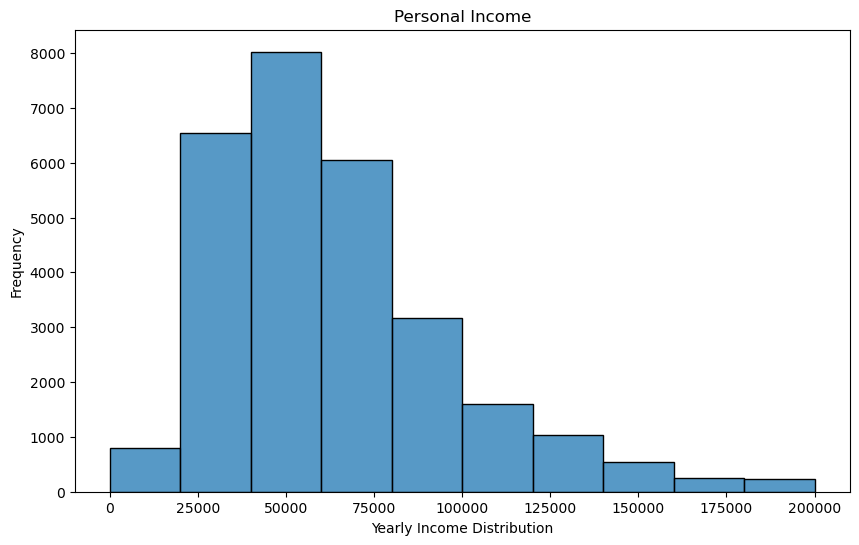

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='person_income', bins=np.arange(0, 220000, step=20000))
plt.title('Personal Income')
plt.xlabel('Yearly Income Distribution')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

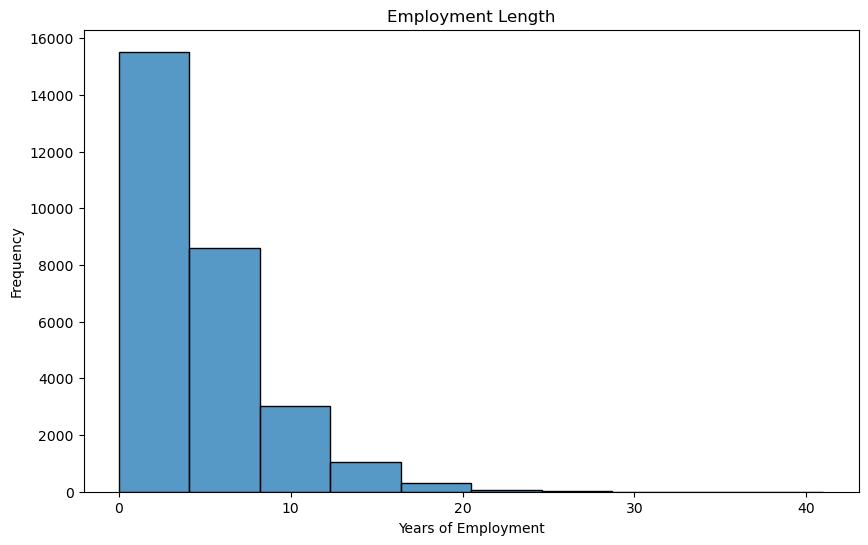

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='person_emp_length', bins=10)
plt.title('Employment Length')
plt.xlabel('Years of Employment')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [24]:
target_dist_count = [sum(df['loan_status']==0), sum(df['loan_status']==1)]
target_dist_labels = ['Non-Default','Default']

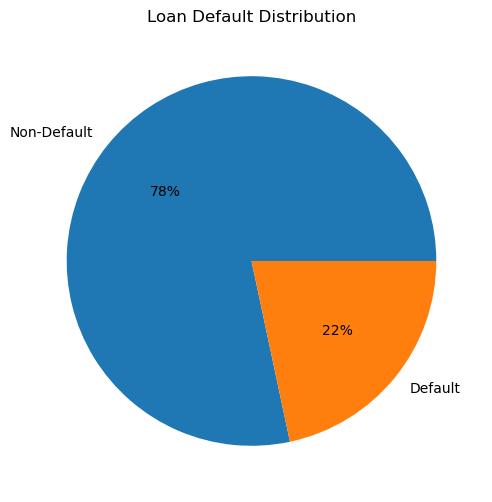

In [25]:
plt.figure(figsize=(10, 6))
plt.pie(target_dist_count, labels=target_dist_labels, autopct='%.0f%%')
plt.title('Loan Default Distribution')
plt.show()

# Setup and Running Models

In [27]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [28]:
X_pre = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [29]:
numeric_columns = X_pre.select_dtypes(exclude=['object']).columns
categorical_columns = X_pre.select_dtypes(include=['object']).columns

In [30]:
pipeline=ColumnTransformer([
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(), categorical_columns),
])

In [31]:
X = pd.DataFrame(
    pipeline.fit_transform(X_pre), 
    columns = pipeline.get_feature_names_out())

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg_pre = LogisticRegression(max_iter=3000, random_state=7, penalty = 'l2')

In [36]:
params_logreg = {
    'C' : [0.1, 1, 10],
    'solver' : ['newton-cholesky','saga']
}

In [37]:
gridsearch_logreg = GridSearchCV(
    estimator=logreg_pre, param_grid=params_logreg, scoring='balanced_accuracy', cv=3)
gridsearch_logreg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=3000, random_state=7),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cholesky', 'saga']},
             scoring='balanced_accuracy')

In [38]:
gridsearch_logreg.best_params_

{'C': 10, 'solver': 'newton-cholesky'}

In [39]:
logreg = gridsearch_logreg.best_estimator_

In [40]:
y_pred_log = logreg.predict(X_test)

In [41]:
cnf_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)

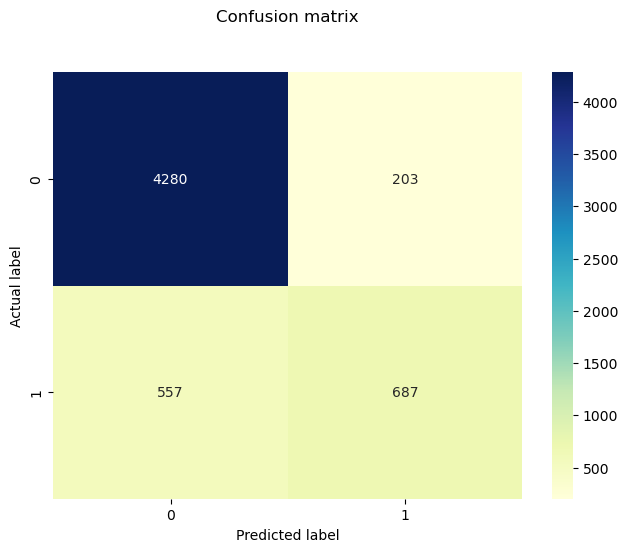

In [42]:
sns.heatmap(cnf_matrix_log, cmap = 'YlGnBu', annot=True, fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
print('Logistic Regression Scoring')
print('F1 Score: ', round(metrics.f1_score(y_test, y_pred_log), 2))
print('Accuracy: ', round(metrics.accuracy_score(y_test, y_pred_log), 2))
print('Precision: ', round(metrics.precision_score(y_test, y_pred_log), 2))
print('Recall: ', round(metrics.recall_score(y_test, y_pred_log), 2))
print('Balanced Accuracy :', round(metrics.balanced_accuracy_score(y_test, y_pred_log), 2))

Logistic Regression Scoring
F1 Score:  0.64
Accuracy:  0.87
Precision:  0.77
Recall:  0.55
Balanced Accuracy : 0.75


## Support Vector Machine

In [45]:
from sklearn import svm

In [46]:
svc_classifier_pre = svm.SVC(probability=True, random_state=7)

In [47]:
params_svc = {
    'C' : [1, 10],
    'kernel' : ['linear', 'rbf']
}

In [48]:
gridsearch_svc = GridSearchCV(
    estimator=svc_classifier_pre, param_grid=params_svc, scoring='balanced_accuracy', cv=3)
gridsearch_svc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=7),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [49]:
gridsearch_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [50]:
svc_classifier = gridsearch_svc.best_estimator_

In [51]:
y_pred_svc = svc_classifier.predict(X_test)

In [52]:
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)

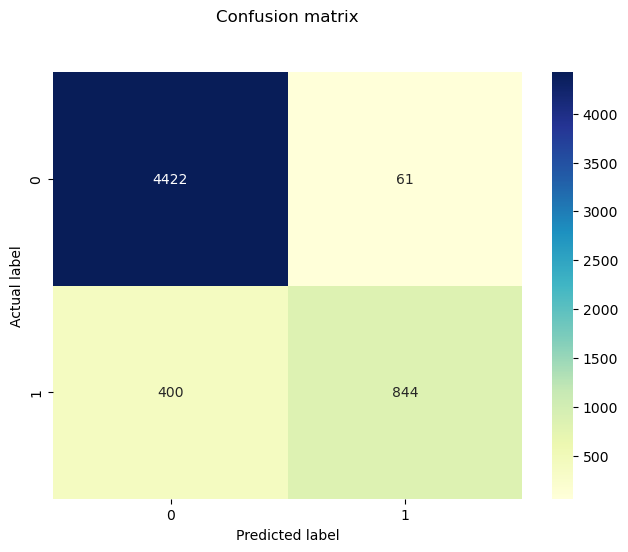

In [53]:
sns.heatmap(cnf_matrix_svc, cmap = 'YlGnBu', annot=True, fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [54]:
print('Support Vector Machine Scoring')
print('F1 Score: ', round(metrics.f1_score(y_test, y_pred_svc), 2))
print('Accuracy: ', round(metrics.accuracy_score(y_test, y_pred_svc), 2))
print('Precision: ', round(metrics.precision_score(y_test, y_pred_svc), 2))
print('Recall: ', round(metrics.recall_score(y_test, y_pred_svc), 2))
print('Balanced Accuracy :', round(metrics.balanced_accuracy_score(y_test, y_pred_svc), 2))

Support Vector Machine Scoring
F1 Score:  0.79
Accuracy:  0.92
Precision:  0.93
Recall:  0.68
Balanced Accuracy : 0.83


## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
tree_classifier_pre = RandomForestClassifier(random_state=7)

In [58]:
params_tree = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [1, 5, 10]
}

In [59]:
gridsearch_tree = GridSearchCV(
    estimator=tree_classifier_pre, param_grid=params_tree, scoring='balanced_accuracy', cv=3)
gridsearch_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='balanced_accuracy')

In [60]:
gridsearch_tree.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [61]:
tree_classifier = gridsearch_tree.best_estimator_

In [62]:
y_pred_tree = tree_classifier.predict(X_test)

In [63]:
cnf_matrix_tree = metrics.confusion_matrix(y_test, y_pred_tree)

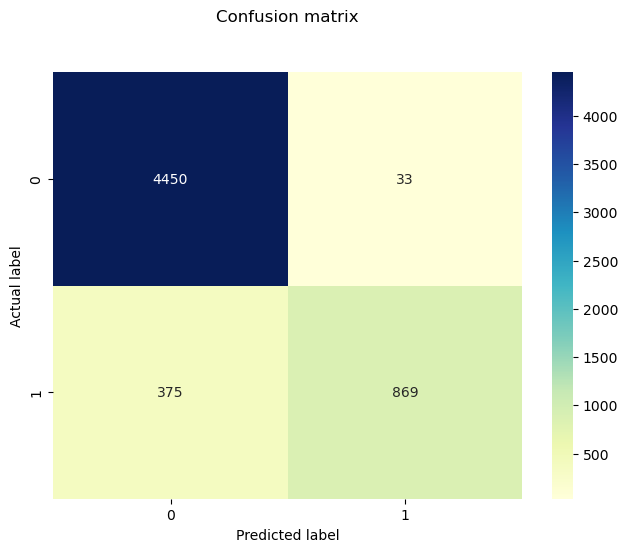

In [64]:
sns.heatmap(cnf_matrix_tree, cmap = 'YlGnBu', annot=True, fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
print('Random Forest Classifier Scoring')
print('F1 Score: ', round(metrics.f1_score(y_test, y_pred_tree), 2))
print('Accuracy: ', round(metrics.accuracy_score(y_test, y_pred_tree), 2))
print('Precision: ', round(metrics.precision_score(y_test, y_pred_tree), 2))
print('Recall: ', round(metrics.recall_score(y_test, y_pred_tree), 2))
print('Balanced Accuracy :', round(metrics.balanced_accuracy_score(y_test, y_pred_tree), 2))

Random Forest Classifier Scoring
F1 Score:  0.81
Accuracy:  0.93
Precision:  0.96
Recall:  0.7
Balanced Accuracy : 0.85


# Model Comparison

In [67]:
models = {
    'Logistic Regression' : logreg,
    'Support Vector Machine' : svc_classifier,
    'Random Forest Classification' : tree_classifier
}

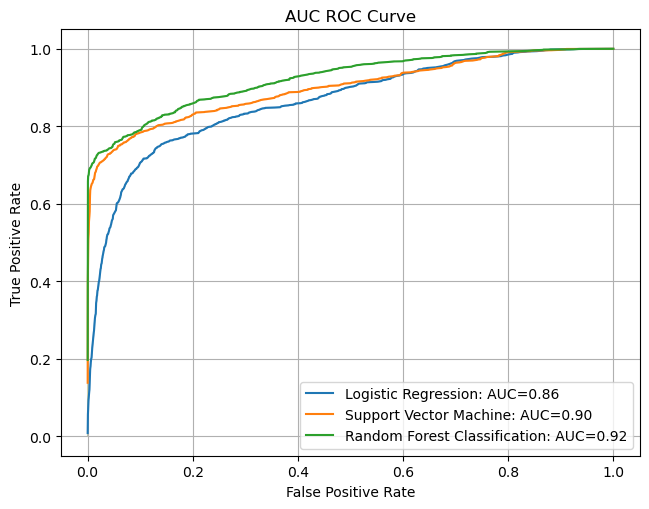

In [68]:
for model_name, model in models.items():
    
    # finding the probabilities for each model
    y_proba = model.predict_proba(X_test)[:, 1]

    # finding the ROC scores
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
    roc_score = metrics.roc_auc_score(y_test, y_proba)

    # plotting
    sns.lineplot(x=fpr, y=tpr, label=f'{model_name}: AUC={roc_score:.2f}')

plt.tight_layout()
plt.title('AUC ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Conclusion

Altogether, the Random Forest Classifier performed much better than the Logistic Regression (Logit) model and slightly better than the Support Vector Machine (SVM) model. With a Balanced Accuracy (BA) score of 0.85 and an AUC score of 0.92, the Random Forest Classifier was better able to correctly identify loan default compared to the Logistic Regression model (BA = 0.75, AUC = 0.86) and the Support Vector Machine model (BA = 0.83, AUC = 0.90). One item to consider is that tree-based methods are more likely to overfit, as such, it may be beneficial to see how well the models perform as the data moves further away from the training data. Given that SVM models can be better generalized, if concerns data are straying far from the training data (for example, a bank opening in a new market with a different customer base) it might be a good idea to implement the SVM model. Otherwise, the Random Forest Classifier model is the preferred choice. 